###  Covid19 Analysis

This is a Covid19 data of Jan 2020 to August 2021, only Jan to August 2021 data was used for this analysis.
The analysis shows the most affected countries in the world and also analyse countries in Europe to view the most affectted location and analyse the % of people that pass out as a result of covid and cardiovasc alongside, it also shows the relationship between their gdp, life expentancy and human development.

Data Source- Kaggle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('float_format', '{:,.2f}'.format)

In [2]:
covid = pd.read_csv('/Users/tolumide/Downloads/covid-data.csv') 
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,24-02-2020,1.00,1.00,nan,nan,nan,nan,0.03,0.03,nan,nan,nan,nan,nan,"1,803.99",597.03,9.59,37.75,0.50,64.83,0.51
1,AFG,Asia,Afghanistan,25-02-2020,1.00,0.00,nan,nan,nan,nan,0.03,0.00,nan,nan,nan,nan,nan,"1,803.99",597.03,9.59,37.75,0.50,64.83,0.51
2,AFG,Asia,Afghanistan,26-02-2020,1.00,0.00,nan,nan,nan,nan,0.03,0.00,nan,nan,nan,nan,nan,"1,803.99",597.03,9.59,37.75,0.50,64.83,0.51
3,AFG,Asia,Afghanistan,27-02-2020,1.00,0.00,nan,nan,nan,nan,0.03,0.00,nan,nan,nan,nan,nan,"1,803.99",597.03,9.59,37.75,0.50,64.83,0.51
4,AFG,Asia,Afghanistan,28-02-2020,1.00,0.00,nan,nan,nan,nan,0.03,0.00,nan,nan,nan,nan,nan,"1,803.99",597.03,9.59,37.75,0.50,64.83,0.51


In [3]:
covid.shape

(112660, 24)

### Filter 2021

In [4]:
new_covid=covid[covid['date'].str.contains('2021', na=False)].reset_index(drop=True)
new_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,01-01-2021,"51,526.00",0.00,102.29,"2,191.00",0.00,7.43,"1,293.47",0.00,2.57,55.00,0.00,0.19,0.58,"1,803.99",597.03,9.59,37.75,0.50,64.83,0.51
1,AFG,Asia,Afghanistan,02-01-2021,"51,526.00",0.00,91.43,"2,191.00",0.00,6.00,"1,293.47",0.00,2.29,55.00,0.00,0.15,0.56,"1,803.99",597.03,9.59,37.75,0.50,64.83,0.51
2,AFG,Asia,Afghanistan,03-01-2021,"51,526.00",0.00,69.57,"2,191.00",0.00,4.43,"1,293.47",0.00,1.75,55.00,0.00,0.11,0.54,"1,803.99",597.03,9.59,37.75,0.50,64.83,0.51
3,AFG,Asia,Afghanistan,04-01-2021,"53,011.00","1,485.00",247.29,"2,237.00",46.00,9.00,"1,330.75",37.28,6.21,56.16,1.16,0.23,0.54,"1,803.99",597.03,9.59,37.75,0.50,64.83,0.51
4,AFG,Asia,Afghanistan,05-01-2021,"53,105.00",94.00,250.71,"2,244.00",7.00,9.29,"1,333.11",2.36,6.29,56.33,0.18,0.23,0.53,"1,803.99",597.03,9.59,37.75,0.50,64.83,0.51


In [5]:
new_covid.shape

(52529, 24)

In [35]:
new_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52529 entries, 0 to 52528
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         52529 non-null  object        
 1   continent                        50369 non-null  object        
 2   location                         52529 non-null  object        
 3   date                             52529 non-null  datetime64[ns]
 4   total_cases                      48090 non-null  float64       
 5   new_cases                        48089 non-null  float64       
 6   new_cases_smoothed               48075 non-null  float64       
 7   total_deaths                     45972 non-null  float64       
 8   new_deaths                       45971 non-null  float64       
 9   new_deaths_smoothed              48075 non-null  float64       
 10  total_cases_per_million          47850 non-null  float64  

### Clean data

In [7]:
# new_covid=new_covid.fillna(0)
# new_covid.head()

In [34]:
# new_covid[['total_cases', 'new_cases',
#        'new_cases_smoothed', 'total_deaths', 'new_deaths',
#        'new_deaths_smoothed', 'total_cases_per_million',
#        'new_cases_per_million', 'new_cases_smoothed_per_million',
#        'total_deaths_per_million', 'new_deaths_per_million',
#        'new_deaths_smoothed_per_million', 'reproduction_rate',
#        'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
#        'handwashing_facilities', 'hospital_beds_per_thousand',
#        'life_expectancy', 'human_development_index']] = new_covid[['total_cases', 'new_cases',
#        'new_cases_smoothed', 'total_deaths', 'new_deaths',
#        'new_deaths_smoothed', 'total_cases_per_million',
#        'new_cases_per_million', 'new_cases_smoothed_per_million',
#        'total_deaths_per_million', 'new_deaths_per_million',
#        'new_deaths_smoothed_per_million', 'reproduction_rate',
#        'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
#        'handwashing_facilities', 'hospital_beds_per_thousand',
#        'life_expectancy', 'human_development_index']].apply(pd.to_numeric, errors='ignore')

# pd.to_datetime(new_covid["date"])
# new_covid["date"] = pd.to_datetime(new_covid["date"])

### Location with the highest number of total cases within January and August 2021¶

In [9]:
covid_loc =new_covid.groupby(['location', 'continent'])['total_cases'].max().sort_values(ascending=False).reset_index()
covid_highest = covid_loc.head(10)
covid_highest

,location,continent,total_cases
0,United States,North America,"38,760,363.00"
1,India,Asia,"32,695,030.00"
2,Brazil,South America,"20,728,605.00"
3,France,Europe,"6,813,516.00"
4,Russia,Europe,"6,766,667.00"
5,United Kingdom,Europe,"6,729,912.00"
6,Turkey,Asia,"6,329,519.00"
7,Argentina,South America,"5,171,458.00"
8,Colombia,South America,"4,903,304.00"
9,Iran,Asia,"4,895,448.00"


United State house the highest number of covid victims

In [10]:
fig =px.bar(covid_highest, x= 'continent', y= 'total_cases',
            hover_data= ['location'], color='location',
            title= 'Countries with the Highest Total Cases within January - August 2021',text='total_cases')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

### Continent with the highest number of total cases

In [11]:
covid_continent= new_covid.pivot_table(values='total_cases', index='location', columns='continent', aggfunc=np.sum,
                                       margins= True, margins_name='Total Cases')
covid_continent

continent,Africa,Asia,Europe,North America,Oceania,South America,Total Cases
location,,,,,,,
Afghanistan,nan,"19,976,288.00",nan,nan,nan,nan,"19,976,288.00"
Albania,nan,nan,"28,219,763.00",nan,nan,nan,"28,219,763.00"
Algeria,"31,325,804.00",nan,nan,nan,nan,nan,"31,325,804.00"
Andorra,nan,nan,"2,998,928.00",nan,nan,nan,"2,998,928.00"
Angola,"7,113,634.00",nan,nan,nan,nan,nan,"7,113,634.00"
...,...,...,...,...,...,...,...
Wallis and Futuna,nan,nan,nan,nan,0.00,nan,nan
Yemen,nan,"1,220,424.00",nan,nan,nan,nan,"1,220,424.00"
Zambia,"26,122,488.00",nan,nan,nan,nan,nan,"26,122,488.00"


This shows the total number of covid victims in respect to their continent, Europe has been recorded as the largest home of covid victims and countries under europe are France, Spain, Italy, United Kingdom, Turkey, Germany..

### Location with the highest number of death cases

In [12]:
covid_loc_death =new_covid.groupby(['continent', 'location'])['total_deaths'].max().sort_values(ascending=False).reset_index()
c_l_d= covid_loc_death.head(10)
c_l_d

,continent,location,total_deaths
0,North America,United States,"637,254.00"
1,South America,Brazil,"579,010.00"
2,Asia,India,"437,830.00"
3,North America,Mexico,"257,906.00"
4,South America,Peru,"198,064.00"
5,Europe,Russia,"177,679.00"
6,Europe,United Kingdom,"132,699.00"
7,Asia,Indonesia,"131,372.00"
8,Europe,Italy,"129,056.00"
9,South America,Colombia,"124,743.00"


In [13]:
fig =px.bar(c_l_d, x= 'location', y= 'total_deaths', hover_data= ['continent'],
            title= 'Countries with the Highest Number of Death Cases within January - August 2021',text='total_deaths')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

### Continent with the highest number of death cases

In [14]:
covid_continent_death= new_covid.pivot_table(values='total_deaths', index='location', columns='continent', aggfunc=np.sum, margins= True, margins_name='Total Cases')
covid_continent_death

continent,Africa,Asia,Europe,North America,Oceania,South America,Total Cases
location,,,,,,,
Afghanistan,nan,"869,822.00",nan,nan,nan,nan,"869,822.00"
Albania,nan,nan,"511,326.00",nan,nan,nan,"511,326.00"
Algeria,"826,737.00",nan,nan,nan,nan,nan,"826,737.00"
Andorra,nan,nan,"28,220.00",nan,nan,nan,"28,220.00"
Angola,"166,737.00",nan,nan,nan,nan,nan,"166,737.00"
...,...,...,...,...,...,...,...
Wallis and Futuna,nan,nan,nan,nan,0.00,nan,nan
Yemen,nan,"253,423.00",nan,nan,nan,nan,"253,423.00"
Zambia,"392,711.00",nan,nan,nan,nan,nan,"392,711.00"


### Checking the most affected countries in Europe

In [53]:
covid_europe=new_covid[new_covid['continent']=='Europe'].reset_index(drop=True)
covid_europe.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ALB,Europe,Albania,2021-01-01,"58,316.00",0.00,419.43,"1,181.00",0.00,6.71,"20,298.41",0.00,145.99,411.08,0.00,2.34,0.90,"11,803.43",304.19,10.08,nan,2.89,78.57,0.80
1,ALB,Europe,Albania,2021-02-01,"58,991.00",675.00,462.29,"1,190.00",9.00,6.71,"20,533.36",234.95,160.91,414.21,3.13,2.34,0.97,"11,803.43",304.19,10.08,nan,2.89,78.57,0.80
2,ALB,Europe,Albania,2021-03-01,"59,438.00",447.00,454.86,"1,193.00",3.00,5.71,"20,688.95",155.59,158.32,415.25,1.04,1.99,1.00,"11,803.43",304.19,10.08,nan,2.89,78.57,0.80
3,ALB,Europe,Albania,2021-04-01,"59,623.00",185.00,435.86,"1,199.00",6.00,5.00,"20,753.35",64.39,151.71,417.34,2.09,1.74,1.03,"11,803.43",304.19,10.08,nan,2.89,78.57,0.80
4,ALB,Europe,Albania,2021-05-01,"60,283.00",660.00,448.14,"1,210.00",11.00,5.71,"20,983.08",229.73,155.99,421.17,3.83,1.99,1.10,"11,803.43",304.19,10.08,nan,2.89,78.57,0.80


In [16]:
covid_europe.shape

(12074, 24)

In [19]:
covid_e =covid_europe.groupby('location')['total_cases'].max().sort_values(ascending=False).reset_index()
c_e= covid_e.head(10)
c_e

,location,total_cases
0,France,"6,813,516.00"
1,Russia,"6,766,667.00"
2,United Kingdom,"6,729,912.00"
3,Spain,"4,831,809.00"
4,Italy,"4,524,292.00"
5,Germany,"3,933,585.00"
6,Poland,"2,888,028.00"
7,Ukraine,"2,379,159.00"
8,Netherlands,"1,969,330.00"
9,Czechia,"1,678,731.00"


In [20]:
fig = px.bar(c_e, x="location", y="total_cases", title= 'Top Countries with Covid Cases in Africa', text= 'total_cases')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

### Relationship between  the death caused by COVID and  CARDIO

In [28]:
covid_e =covid_europe.groupby(['location','cardiovasc_death_rate'])['total_cases'].max().sort_values(ascending=False).reset_index()
c_d_e= covid_e.head(10)
c_d_e

,location,cardiovasc_death_rate,total_cases
0,France,86.06,"6,813,516.00"
1,Russia,431.30,"6,766,667.00"
2,United Kingdom,122.14,"6,729,912.00"
3,Spain,99.40,"4,831,809.00"
4,Italy,113.15,"4,524,292.00"
5,Germany,156.14,"3,933,585.00"
6,Poland,227.33,"2,888,028.00"
7,Ukraine,539.85,"2,379,159.00"
8,Netherlands,109.36,"1,969,330.00"
9,Czechia,227.49,"1,678,731.00"


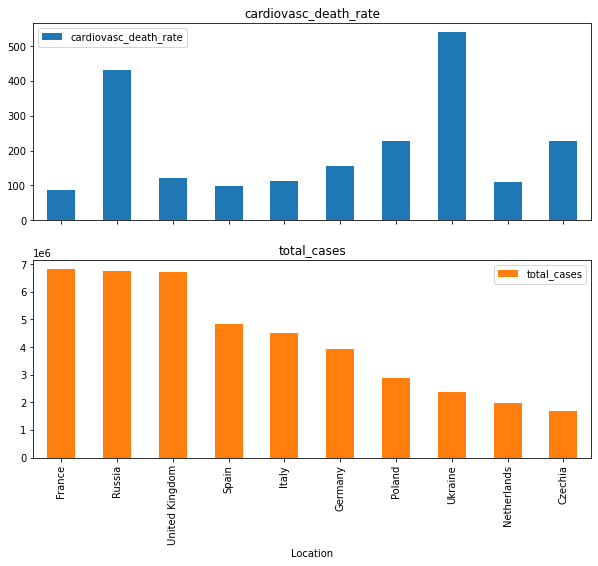

In [29]:
c_d_e.plot.bar(x='location', subplots=True,figsize=(10,8))
plt.xlabel('Location');

In [31]:
covid_e =covid_europe.groupby(['location', 'life_expectancy','gdp_per_capita', 'human_development_index'])['new_cases'].max().sort_values(ascending=False).reset_index()
c_d_e1= covid_e.head(15)
c_d_e1

,location,life_expectancy,gdp_per_capita,human_development_index,new_cases
0,France,82.66,"38,605.67",0.90,"117,900.00"
1,Spain,83.56,"34,272.36",0.90,"93,822.00"
2,United Kingdom,81.32,"39,753.24",0.93,"68,192.00"
3,Germany,81.33,"45,229.25",0.95,"45,333.00"
4,Poland,78.73,"27,216.44",0.88,"35,253.00"
5,Sweden,82.80,"46,949.28",0.94,"32,369.00"
6,Italy,83.51,"35,220.08",0.89,"26,790.00"
7,Russia,72.58,"24,765.95",0.82,"26,613.00"
8,Ukraine,72.06,"7,894.39",0.78,"20,456.00"
9,Czechia,79.38,"32,605.91",0.90,"17,773.00"


In [33]:
fig =px.scatter(c_d_e1, x= 'gdp_per_capita', y= 'human_development_index',
            hover_data= ['location','new_cases','life_expectancy'], color='location',
            title= 'Countries Wellbeing within January - August 2021', size='new_cases')

fig.show()